In [1]:
import os, sys, time
from pathlib import Path
PARENT_DIR = Path(os.getcwd()).resolve().parent
sys.path += [str(PARENT_DIR.joinpath('SciPyFST'))]
from SciPyFST import SciPyFST as FST
from examples_data.MealyFST import mealyFSTmap as mealyFSTmap
import graphviz, wavedrom
from IPython.display import display, Markdown

isContains

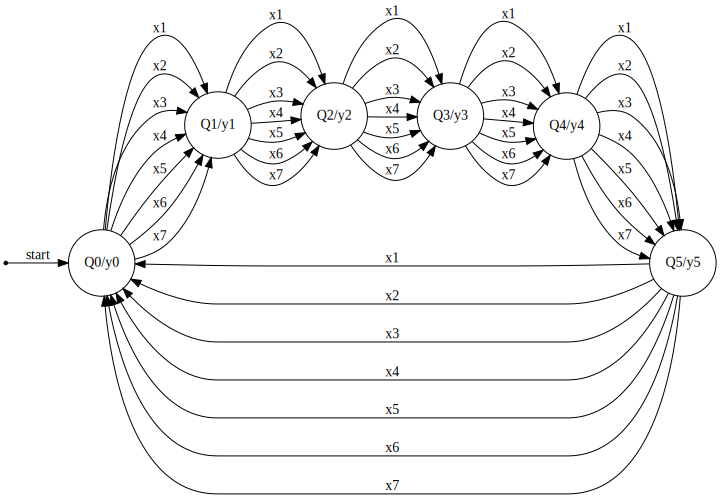

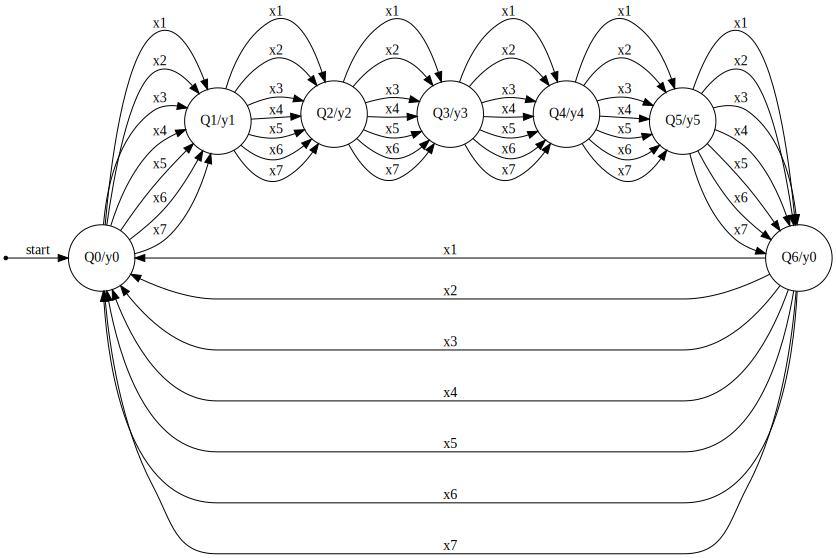

In [2]:
def getCiclicFST(stateNum = 6, signalNum = 3, maxUniOut = 5):
    transitionFunction = []
    outputFunction = []
    for st in range(0, stateNum, 1):
        stateA = "Q" + str(st)
        stateB = "Q" + ( "0" if st == (stateNum - 1) else str(st + 1) )
        signalOut = "y" + ( "0" if st >= maxUniOut else str(st) )
        outputFunction.append([stateA, signalOut])
        for sig in range(1, signalNum + 1, 1):
            signalIn = "x" + str(sig)
            transitionFunction.append([stateA, signalIn, stateB])
    return FST(initState='Q0', transitionFunction=transitionFunction, outputFunction=outputFunction)

small = getCiclicFST(stateNum = 6, signalNum = 7, maxUniOut = 6)
big = getCiclicFST(stateNum = 7, signalNum = 7, maxUniOut = 6)
display(graphviz.Source(small.toDot()))
display(graphviz.Source(big.toDot()))

In [3]:
t = time.time()
print('big.isContains(small) = ' + str(big.isContains(small)) + ' \telapsed time = {} s'.format(time.time() - t))
t = time.time()
print('small.isContains(big) = ' + str(small.isContains(big)) + ' \telapsed time = {} s'.format(time.time() - t))
t = time.time()
print('big._isContains(small) = ' + str(big._isContains(small)) + ' \telapsed time = {} s'.format(time.time() - t))
t = time.time()
print('small._isContains(big) = ' + str(small._isContains(big)) + ' \telapsed time = {} s'.format(time.time() - t))

big.isContains(small) = True 	elapsed time = 3.683042049407959 s
small.isContains(big) = False 	elapsed time = 0.00099945068359375 s
big._isContains(small) = True 	elapsed time = 3.5857625007629395 s
small._isContains(big) = False 	elapsed time = 15.46883249282837 s
